In [ ]:
!pip install pandas
!pip install pandas_ta
!pip install yfinance
!pip install requests_cache
!pip install matplotlib
!pip install mplfinance

In [ ]:
# For more information on this notebook, see my blog posts:
# https://medium.com/wwblog/technical-analysis-of-investment-prices-with-python-fe44fcdbceea
# https://medium.com/wwblog/using-papermill-to-auto-generate-technical-analyses-for-investments-19900e518f9e
# https://medium.com/wwblog/create-a-stochastic-oscillator-in-python-a7da42473677

import pandas as pd
import pandas_ta as ta
import yfinance as yf
import requests_cache
import matplotlib.pyplot as plt
import mplfinance as mpf

from IPython.display import display, Markdown, Latex
from matplotlib.lines import Line2D

# In the blog post, I included the various prep and plot functions directly in the notebook itself.
# But I'm moved these to external scripts to avoid cluttering up the technical analysis with a bunch of code.
%run "define_df.py"
%run "plot_df.py"
%run "output_df.py"

In [ ]:
# Parameters = ["0700.HK", "0939.HK", "2628.HK"]
ticker_symbols = ["0700.HK", "0939.HK", "2628.HK"]

In [ ]:
## Creates a cached session object that is used for HTTP requests sent to the Yahoo Finance API.
session = requests_cache.CachedSession("yfinance.cache")
tickers = []

for ticker_symbol in ticker_symbols:
  ## Set a custom User-Agent header to identify the requesting source to the API.
  session.headers["User-Agent"] = f"ta-{ticker_symbol}-notebook/1.0"
  ## Create a 'Ticker' object from the 'yf' module and append to 'Tickers' list of objects.
  ticker = yf.Ticker(ticker_symbol, session=session)
  tickers.append(ticker)
  ## Retrieve the short name of the company for the 'ticker' object.
  ticker_short_name = ticker.info["shortName"]
  ## Format a Markdown string and displays as output using 'display()' function.
  display(Markdown(f"# Technical analysis: {ticker_short_name} ({ticker_symbol}), {today_str}"))
  display(session.headers)

# Technical analysis: TENCENT (0700.HK), 2023-09-13

{'User-Agent': 'ta-0700.HK-notebook/1.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

# Technical analysis: CCB (0939.HK), 2023-09-13

{'User-Agent': 'ta-0939.HK-notebook/1.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

# Technical analysis: CHINA LIFE (2628.HK), 2023-09-13

{'User-Agent': 'ta-2628.HK-notebook/1.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [ ]:
# Use unadjusted close prices, since we want to plot capital gains:
# (i.e. exclude cash flow yields like dividends).
## Retrieve the historical market data for a particular stock.
## Set the start date to two year aga and end date to the current date.
## "Without any adjustments" typically refers to not adjusted to reflect any corporate actions.
## E.g., issues a dividend might lead to a drop in stock price, due to dividend payment.
## Historical prices are returned without any adjustments.
for ticker in tickers:
  hist = ticker.history(start=date_ranges["2Y"], end=today_str, auto_adjust=False, back_adjust=False)
  ## Prints the first few rows.
  display(hist.head())

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-09-13 00:00:00+08:00,480.000000,481.200012,471.000000,478.000000,472.402130,27815639,0.0,0.0
2021-09-14 00:00:00+08:00,476.399994,482.799988,468.799988,472.799988,467.263031,19905281,0.0,0.0
2021-09-15 00:00:00+08:00,458.000000,464.000000,451.200012,453.399994,448.090240,36166267,0.0,0.0
2021-09-16 00:00:00+08:00,446.799988,454.799988,445.000000,451.000000,445.718323,24519868,0.0,0.0
2021-09-17 00:00:00+08:00,445.799988,467.600006,445.200012,461.799988,456.391846,23982628,0.0,0.0


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-09-13 00:00:00+08:00,5.70,5.80,5.69,5.80,4.912955,190161693,0.0,0.0
2021-09-14 00:00:00+08:00,5.80,5.84,5.65,5.66,4.794366,295718068,0.0,0.0
2021-09-15 00:00:00+08:00,5.68,5.74,5.62,5.68,4.811307,266194530,0.0,0.0
2021-09-16 00:00:00+08:00,5.71,5.71,5.57,5.66,4.794366,279417038,0.0,0.0
2021-09-17 00:00:00+08:00,5.61,5.66,5.55,5.65,4.785896,373588536,0.0,0.0


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-09-13 00:00:00+08:00,13.22,13.44,13.18,13.44,12.178532,17547507,0.0,0.0
2021-09-14 00:00:00+08:00,13.46,13.64,13.18,13.28,12.033549,27655457,0.0,0.0
2021-09-15 00:00:00+08:00,13.26,13.36,13.16,13.20,11.961058,25743117,0.0,0.0
2021-09-16 00:00:00+08:00,13.20,13.24,12.88,13.10,11.870444,29463332,0.0,0.0
2021-09-17 00:00:00+08:00,13.00,13.04,12.74,12.94,11.725461,60881722,0.0,0.0


In [ ]:
# Generate example dataframes with signals
df1 = add_sma_crossover(hist)
df2 = add_stochastic_oscillator_strat3(hist)

# Combine signals
combined_df = combine_signals(df1, df2, "strat3_combined.txt")

for rng in ["2Y"]: # "6M", "3M"
    plot_stochastic_oscillator_with_combined_signals(df2, ticker_symbol, rng, combined_df=combined_df)

NameError: ignored

In [ ]:
combined_df.head()

,Signal
Date,
2021-05-05 00:00:00+08:00,0
2021-05-06 00:00:00+08:00,0
2021-05-07 00:00:00+08:00,0
2021-05-10 00:00:00+08:00,0
2021-05-11 00:00:00+08:00,0


In [ ]:
plot_stochastic_oscillator_with_signals(df2, ticker_symbol, rng, combined_df=df2)

In [ ]:
records = format_data(combined_df, df2)
print(records)

[[-1, '2021-05-27', 15.739999771118164], [-1, '2021-05-31', 15.739999771118164], [-1, '2021-06-01', 15.739999771118164], [-1, '2021-06-02', 15.739999771118164], [-1, '2021-06-03', 15.739999771118164], [-1, '2021-06-04', 15.739999771118164], [-1, '2021-06-07', 15.739999771118164], [-1, '2021-06-10', 15.739999771118164], [-1, '2021-06-11', 15.739999771118164], [-1, '2021-06-18', 15.739999771118164], [-1, '2021-06-29', 15.739999771118164], [-1, '2021-06-30', 15.739999771118164], [-1, '2021-07-02', 15.739999771118164], [-1, '2021-07-07', 15.739999771118164], [-1, '2021-07-08', 15.739999771118164], [-1, '2021-07-09', 15.739999771118164], [-1, '2021-07-12', 15.739999771118164], [-1, '2021-07-14', 15.739999771118164], [-1, '2021-07-19', 15.739999771118164], [-1, '2021-07-20', 15.739999771118164], [-1, '2021-07-23', 15.739999771118164], [-1, '2021-07-26', 15.739999771118164], [-1, '2021-08-04', 15.739999771118164], [-1, '2021-08-06', 15.739999771118164], [-1, '2021-08-17', 15.739999771118164],

In [ ]:
results = calculate_result(records)
print(results)

In [ ]:
dates = []
capital = []

for result in results:
  dates.append(result[0])
  capital.append(result[2])

In [ ]:
print(calculate_profit_and_variance(dates, capital))

(0, 0)


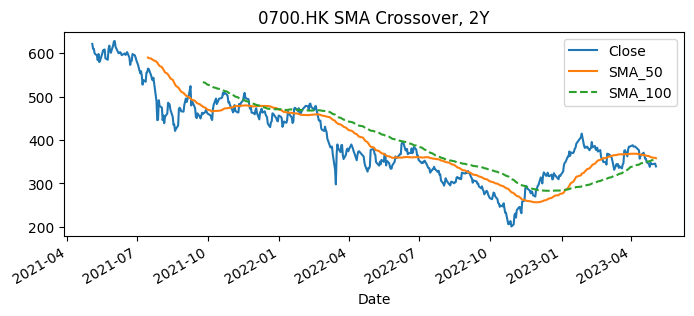

In [ ]:
df = add_sma_crossover(hist)
for rng in ["2Y"]: # "6M", "3M"
  plot_sma_crossover(df, ticker_symbol, rng)

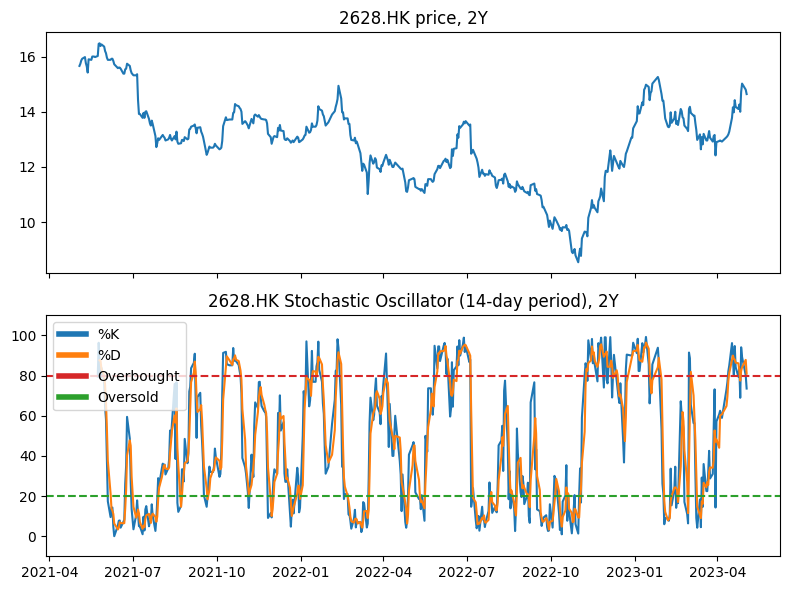

In [ ]:
df = add_stochastic_oscillator_strat1(hist)
for rng in ["2Y"]: # "6M", "3M"
    plot_stochastic_oscillator(df, ticker_symbol, rng)